In [213]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airline-passengers/airline_passengers.csv
/kaggle/input/google-stock-csv/google (1).csv


In [214]:
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sms

In [215]:
# pip install yfinance

In [216]:
google=pd.read_csv("/kaggle/input/google-stock-csv/google (1).csv")
google

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276
...,...,...,...,...,...,...,...
4466,2022-05-16,2307.679932,2332.149902,2286.699951,2295.850098,2295.850098,1164100
4467,2022-05-17,2344.550049,2344.550049,2306.750000,2334.030029,2334.030029,1078800
4468,2022-05-18,2304.750000,2313.913086,2242.840088,2248.020020,2248.020020,1399100
4469,2022-05-19,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600


In [217]:
google['Date']=pd.to_datetime(google['Date'])

In [218]:
google.set_index('Date',inplace=True)

## Simple Moving Avg
- `calculates the average of a selected range of prices, usually closing prices, by the number of periods in that range`
- `Used in smoothning the curve`


In [219]:
google['SMA_10']=google['Close'].rolling(10,min_periods=1).mean()
google['SMA_30']=google['Close'].rolling(30,min_periods=1).mean()
google['SMA_50']=google['Close'].rolling(50,min_periods=1).mean()

In [220]:
google

,Open,High,Low,Close,Adj Close,Volume,SMA_10,SMA_30,SMA_50
Date,,,,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,49.982655,49.982655,49.982655
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874,51.967713,51.967713,51.967713
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897,52.810387,52.810387,52.810387
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808,52.667589,52.667589,52.667589
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276,52.694489,52.694489,52.694489
...,...,...,...,...,...,...,...,...,...
2022-05-16,2307.679932,2332.149902,2286.699951,2295.850098,2295.850098,1164100,2318.418994,2471.918001,2570.569805
2022-05-17,2344.550049,2344.550049,2306.750000,2334.030029,2334.030029,1078800,2315.562988,2453.957332,2566.664605
2022-05-18,2304.750000,2313.913086,2242.840088,2248.020020,2248.020020,1399100,2295.214990,2434.849333,2560.713604


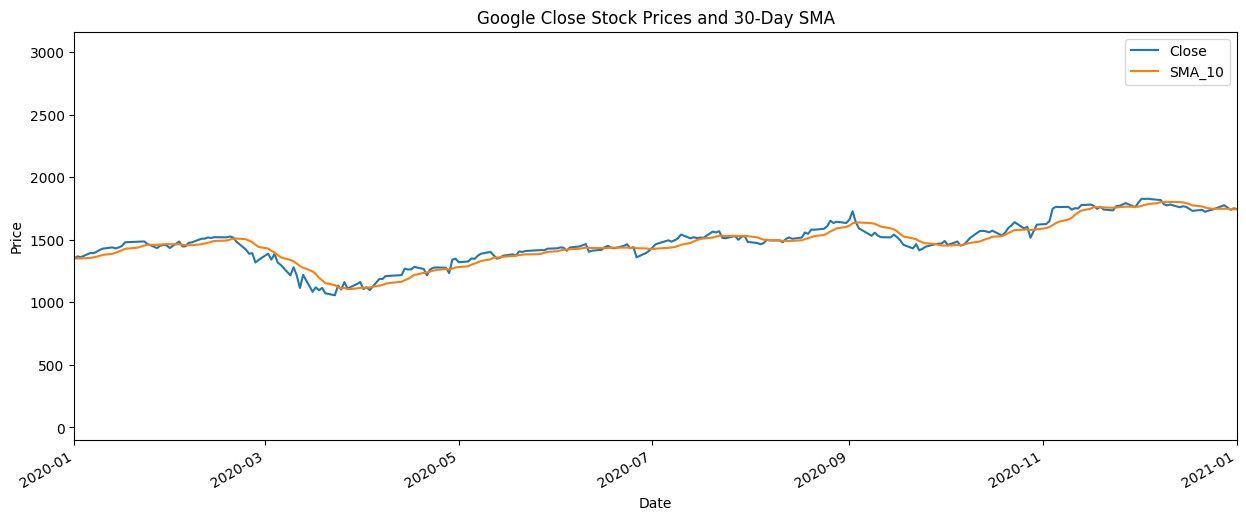

In [221]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,6))
google[['Close','SMA_10']].plot(ax=ax)
plt.title('Google Close Stock Prices and 30-Day SMA')
plt.xlim(['2020','2021-01-01'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

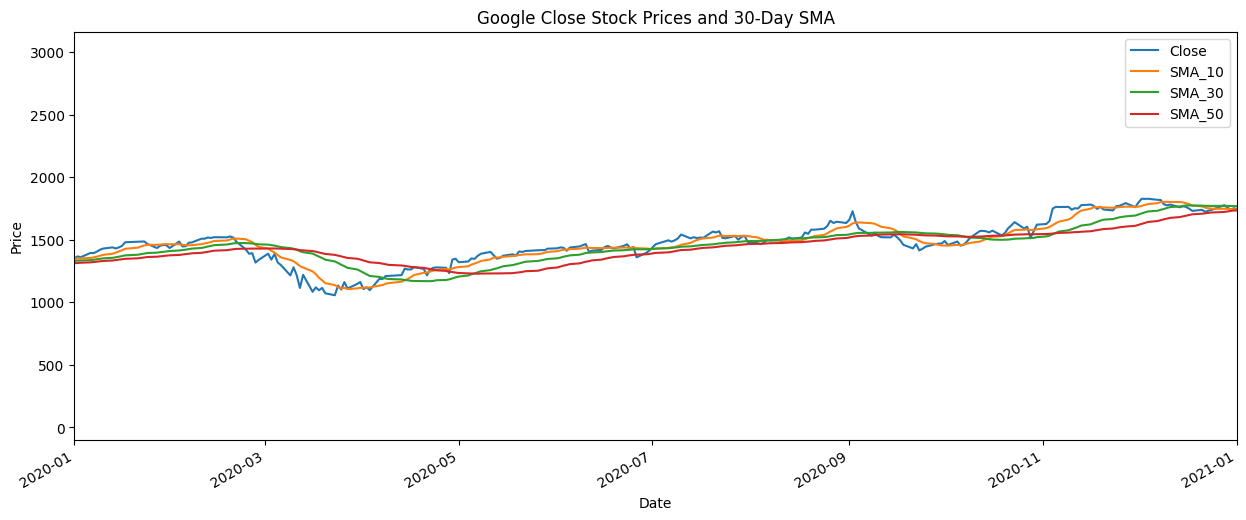

In [222]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,6))
google[['Close','SMA_10','SMA_30','SMA_50']].plot(ax=ax)
plt.title('Google Close Stock Prices and 30-Day SMA')
plt.xlim(['2020-01-01','2021-01-01'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## Cumulative moving average 
`returns the moving average of all data up to the current data point`

<Axes: xlabel='Date'>

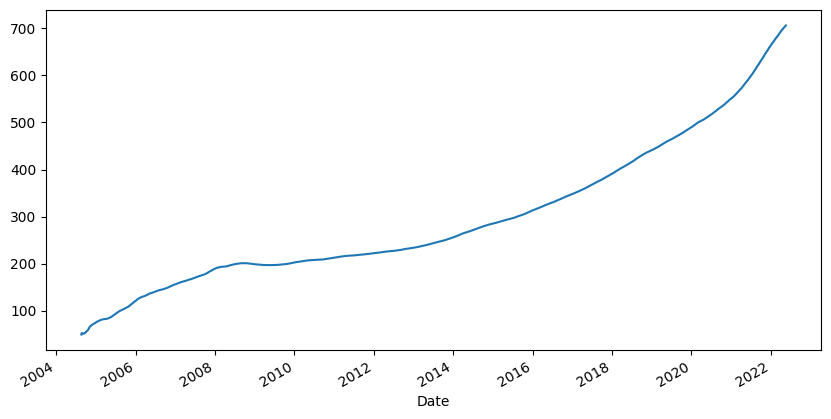

In [223]:
##Cumulative moving average
google['Close'].expanding().mean().plot(figsize=(10,5))

## Exponentially Weighted Moving Average (EWMA)

In [224]:
## EWMA google data
google['EMA_0.1']=google['Close'].ewm(alpha=0.1,adjust=False).mean()
google.head()

,Open,High,Low,Close,Adj Close,Volume,SMA_10,SMA_30,SMA_50,EMA_0.1
Date,,,,,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,49.982655,49.982655,49.982655,49.982655
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874,51.967713,51.967713,51.967713,50.379666
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897,52.810387,52.810387,52.810387,50.791273
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808,52.667589,52.667589,52.667589,50.936066
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276,52.694489,52.694489,52.694489,51.122668


In [225]:
google['EMA_0.3']=google['Close'].ewm(alpha=0.3,adjust=False).mean()

In [226]:
google['EMA_0.5']=google['Close'].ewm(alpha=0.5,adjust=False).mean()

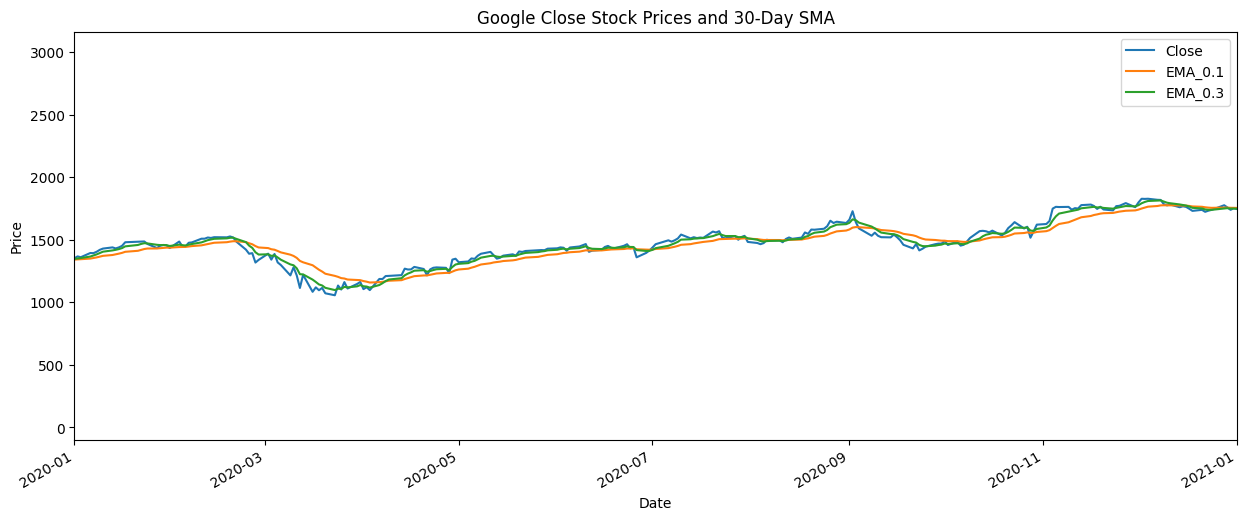

In [227]:

fig, ax = plt.subplots(figsize=(15,6))
google[['Close','EMA_0.1','EMA_0.3']].plot(ax=ax)
plt.title('Google Close Stock Prices and 30-Day SMA')
plt.xlim(['2020','2021-01-01'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [228]:
#### EWMA google data
google['EMA_5days']=google['Close'].ewm(5,adjust=False).mean()
google['EMA_20days']=google['Close'].ewm(20,adjust=False).mean()
google.head(10)

,Open,High,Low,Close,Adj Close,Volume,SMA_10,SMA_30,SMA_50,EMA_0.1,EMA_0.3,EMA_0.5,EMA_5days,EMA_20days
Date,,,,,,,,,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,49.982655,49.982655,49.982655,49.982655,49.982655,49.982655,49.982655,49.982655
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874,51.967713,51.967713,51.967713,50.379666,51.173690,51.967713,50.644341,50.171708
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897,52.810387,52.810387,52.810387,50.791273,52.170303,53.231724,51.286240,50.377614
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808,52.667589,52.667589,52.667589,50.936066,52.190971,52.735460,51.445066,50.466261
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276,52.694489,52.694489,52.694489,51.122668,52.374306,52.768773,51.671236,50.577491
2004-08-26,52.279045,53.773445,52.134586,53.753517,53.753517,7128620,52.870993,52.870993,52.870993,51.385753,52.788069,53.261145,52.018283,50.728730
2004-08-27,53.848164,54.107193,52.647663,52.876804,52.876804,6241307,52.871823,52.871823,52.871823,51.534858,52.814690,53.068975,52.161370,50.831019
2004-08-30,52.443428,52.548038,50.814533,50.814533,50.814533,5221498,52.614662,52.614662,52.614662,51.462825,52.214643,51.941754,51.936897,50.830234
2004-08-31,50.958992,51.661362,50.889256,50.993862,50.993862,4941252,52.434573,52.434573,52.434573,51.415929,51.848408,51.467808,51.779724,50.838026


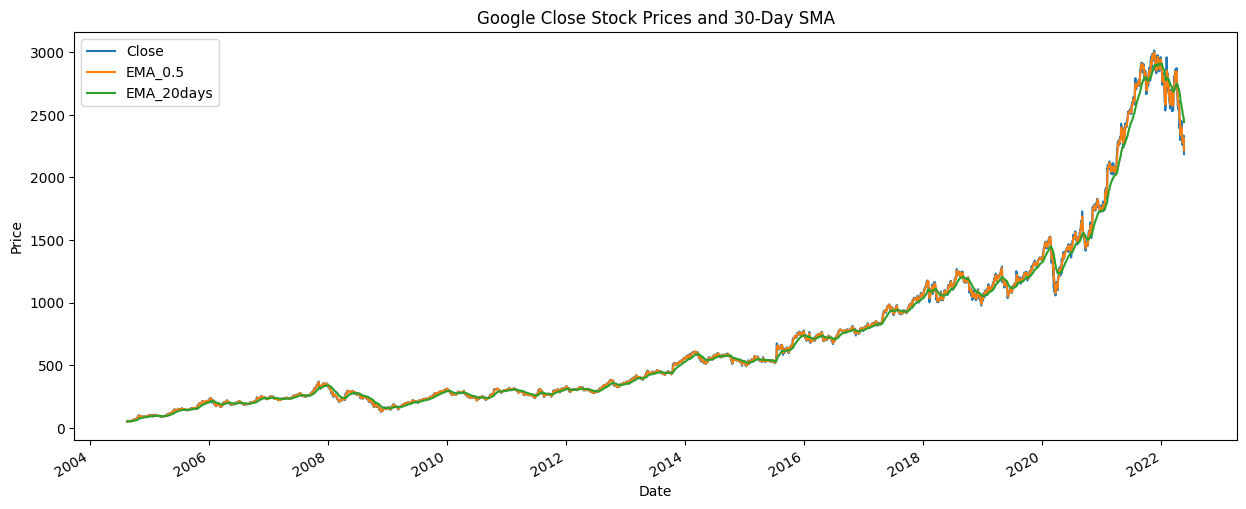

In [229]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,6))
google[['Close','EMA_0.5','EMA_20days']].plot(ax=ax)
plt.title('Google Close Stock Prices and 30-Day SMA')
# plt.xlim(['2020','2021-01-01'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [230]:
df_airline=pd.read_csv('/kaggle/input/airline-passengers/airline_passengers.csv')
df_airline

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [231]:
df_airline.dropna(axis=0,inplace=True)

In [232]:
df_airline

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0


In [233]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [234]:
df_airline.set_index('Month',inplace=True)

In [235]:
from statsmodels.datasets import sunspots
data = sunspots.load_pandas().data
data

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0
...,...,...
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5


In [236]:
data['YEAR']=pd.to_datetime(data['YEAR'])

In [237]:
data

,YEAR,SUNACTIVITY
0,1970-01-01 00:00:00.000001700,5.0
1,1970-01-01 00:00:00.000001701,11.0
2,1970-01-01 00:00:00.000001702,16.0
3,1970-01-01 00:00:00.000001703,23.0
4,1970-01-01 00:00:00.000001704,36.0
...,...,...
304,1970-01-01 00:00:00.000002004,40.4
305,1970-01-01 00:00:00.000002005,29.8
306,1970-01-01 00:00:00.000002006,15.2
307,1970-01-01 00:00:00.000002007,7.5


In [238]:
data.set_index('YEAR',inplace=True)

In [239]:
print(df_airline)
print(data)

            Thousands of Passengers
Month                              
1949-01-01                    112.0
1949-02-01                    118.0
1949-03-01                    132.0
1949-04-01                    129.0
1949-05-01                    121.0
...                             ...
1960-08-01                    606.0
1960-09-01                    508.0
1960-10-01                    461.0
1960-11-01                    390.0
1960-12-01                    432.0

[144 rows x 1 columns]
                               SUNACTIVITY
YEAR                                      
1970-01-01 00:00:00.000001700          5.0
1970-01-01 00:00:00.000001701         11.0
1970-01-01 00:00:00.000001702         16.0
1970-01-01 00:00:00.000001703         23.0
1970-01-01 00:00:00.000001704         36.0
...                                    ...
1970-01-01 00:00:00.000002004         40.4
1970-01-01 00:00:00.000002005         29.8
1970-01-01 00:00:00.000002006         15.2
1970-01-01 00:00:00.000002007      

<Axes: xlabel='Month'>

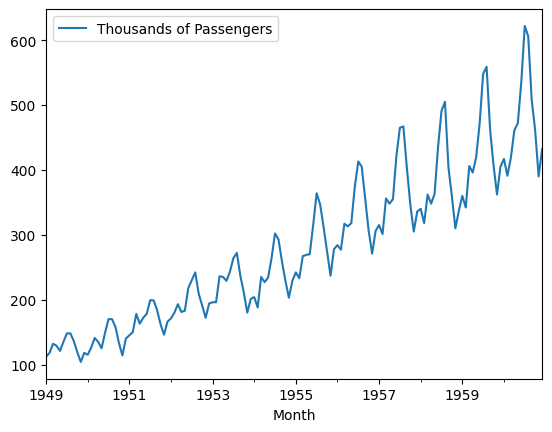

In [240]:
df_airline.plot()

## import Dickey–Fuller test 

In [241]:
from statsmodels.tsa.stattools import adfuller

## Dickey–Fuller test 

In [242]:
def adf_test(series):
    result=adfuller(series)
#     print(result)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [243]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics: 0.8153688792060498
p- value: 0.991880243437641
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## NOW WE TRY TO MAKE YOUR DATA stationary.

In [244]:
## use technique differencing
df_airline['Passengers first differencing']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)

In [245]:
df_airline.head()

,Thousands of Passengers,Passengers first differencing
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [246]:
adf_test(df_airline['Passengers first differencing'].dropna())

ADF Statistics: -2.8292668241700047
p- value: 0.05421329028382478
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [247]:
## use technique differencing
df_airline['Passengers Secound differencing']=df_airline['Passengers first differencing']-df_airline['Passengers first differencing'].shift(1)

In [248]:
df_airline.head()

,Thousands of Passengers,Passengers first differencing,Passengers Secound differencing
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,8.0
1949-04-01,129.0,-3.0,-17.0
1949-05-01,121.0,-8.0,-5.0


In [249]:
adf_test(df_airline['Passengers Secound differencing'].dropna())

ADF Statistics: -16.384231542468513
p- value: 2.7328918500142026e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [250]:
## 12 Month
## use technique differencing
df_airline['Passengers 12 differencing']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)

In [251]:
adf_test(df_airline['Passengers 12 differencing'].dropna())

ADF Statistics: -3.383020726492481
p- value: 0.011551493085514952
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [252]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [253]:
df_airline.head()

,Thousands of Passengers,Passengers first differencing,Passengers Secound differencing,Passengers 12 differencing
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN


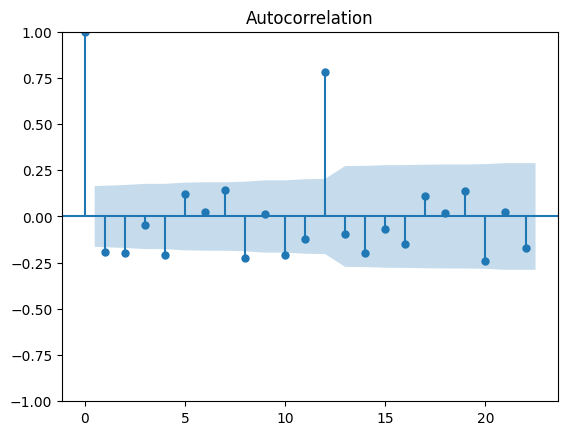

In [254]:
acf = plot_acf(df_airline["Passengers Secound differencing"].dropna())

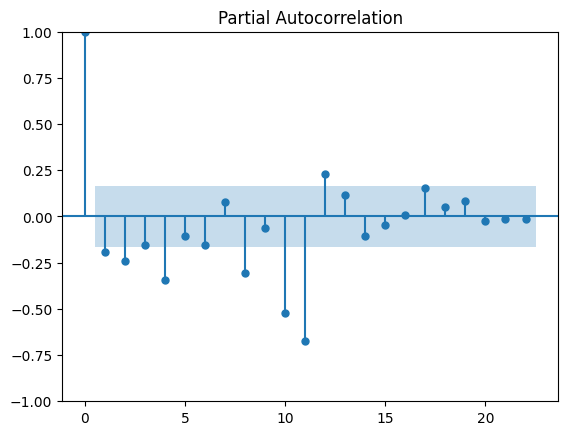

In [255]:
result= plot_pacf(df_airline["Passengers Secound differencing"].dropna())

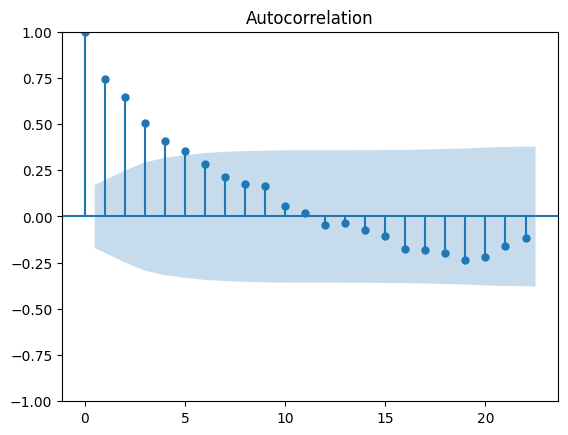

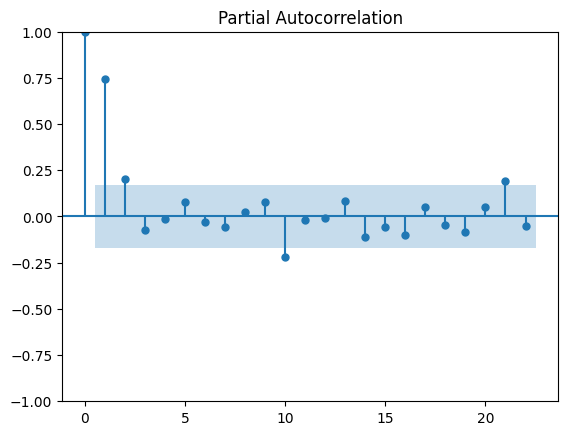

In [256]:
acf12 = plot_acf(df_airline["Passengers 12 differencing"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 differencing"].dropna())

In [257]:
## Split your data into train and test
df_airline

,Thousands of Passengers,Passengers first differencing,Passengers Secound differencing,Passengers 12 differencing
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [258]:
from datetime import datetime,timedelta
train_dataset_end = datetime(1955,12,1)
test_dataset_end = datetime(1960,12,1)

# Split the data into training and testing sets
train_data = df_airline[:train_dataset_end]
test_data = df_airline[train_dataset_end+timedelta(days=1): test_dataset_end]

In [259]:
test_data

,Thousands of Passengers,Passengers first differencing,Passengers Secound differencing,Passengers 12 differencing
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [260]:
train_data = train_data.asfreq('MS')
test_data = test_data.asfreq('MS')

In [261]:
## create a ARIMA model
from statsmodels.tsa.arima.model import ARIMA

In [262]:
train_data

,Thousands of Passengers,Passengers first differencing,Passengers Secound differencing,Passengers 12 differencing
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [263]:
model_arima=ARIMA(train_data['Thousands of Passengers'],order=(10,2,12))

In [264]:
model_fit = model_arima.fit()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [265]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                    ARIMA(10, 2, 12)   Log Likelihood                -307.731
Date:                     Tue, 02 Jul 2024   AIC                            661.463
Time:                             18:59:17   BIC                            716.817
Sample:                         01-01-1949   HQIC                           683.687
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0467      0.115      0.408      0.683      -0.178       0.271
ar.L2         -1.0427      0.083    -12.492      0.000      -1.206      -0.879
ar.L3          0.0884      0.139      0.638      0.524      -0.183       0.360
ar.L4         -1.0254      0.131     -7.834      0.000      -1.282      -0.769
ar.L5          0.0655      0.155      0.422      0.673      -0.238       0.369
ar.L6         -0.9856      0.143     -6.872      0.000      -1.267      -0.704
ar.L7          0.0173      0.142      0.122      0.903      -0.261       0.296
ar.L8         -0.9821      0.123     -8.006      0.000      -1.222      -0.742
ar.L9         -0.0070      0.095     -0.074      0.941      -0.193       0.179
ar.L10        -0.9389      0.085    -11.069      0.000      -1.105      -0.773
ma.L1         -1.2856      0.254     -5.062      0.000      -1.783      -0.788
ma.L2          1.2389      0.358      3.458      0.001       0.537       1.941
ma.L3         -1.4404      0.436     -3.306      0.001      -2.294      -0.586
ma.L4          1.3742      0.506      2.716      0.007       0.383       2.366
ma.L5         -1.2147      0.574     -2.118      0.034      -2.339      -0.091
ma.L6          1.0819      0.660      1.640      0.101      -0.211       2.374
ma.L7         -1.0690      0.715     -1.496      0.135      -2.469       0.332
ma.L8          0.8852      0.819      1.081      0.280      -0.720       2.491
ma.L9         -0.7847      0.737     -1.065      0.287      -2.229       0.659
ma.L10         0.5234      0.601      0.870      0.384      -0.655       1.702
ma.L11        -0.4133      0.455     -0.909      0.364      -1.305       0.478
ma.L12         0.1336      0.273      0.489      0.625      -0.402       0.669
sigma2        77.2063     16.187      4.770      0.000      45.480     108.932
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 4.73
Prob(Q):                              0.99   Prob(JB):                         0.09
Heteroskedasticity (H):               2.12   Skew:                             0.59
Prob(H) (two-sided):                  0.06   Kurtosis:                         2.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [266]:
pre_start_date=test_data.index[0]
pre_end_date=test_data.index[-1]
print(pre_start_date)
print(pre_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [267]:
pred=model_fit.predict(start=pre_start_date,end=pre_end_date)
residuals=test_data['Thousands of Passengers']-pred

In [276]:
pred

1956-01-01    283.246539
1956-02-01    269.494790
1956-03-01    295.161149
1956-04-01    298.564544
1956-05-01    299.095015
1956-06-01    345.350327
1956-07-01    388.487731
1956-08-01    371.891599
1956-09-01    340.072729
1956-10-01    302.917192
1956-11-01    271.826427
1956-12-01    302.643199
1957-01-01    311.084842
1957-02-01    293.776139
1957-03-01    316.912248
1957-04-01    324.478466
1957-05-01    326.090433
1957-06-01    372.691753
1957-07-01    414.564648
1957-08-01    396.556104
1957-09-01    365.283534
1957-10-01    332.258613
1957-11-01    302.550697
1957-12-01    329.485309
1958-01-01    338.552860
1958-02-01    318.358478
1958-03-01    338.877639
1958-04-01    350.466680
1958-05-01    353.213152
1958-06-01    399.557254
1958-07-01    440.501402
1958-08-01    421.301306
1958-09-01    390.662467
1958-10-01    361.629812
1958-11-01    333.231640
1958-12-01    356.331516
1959-01-01    365.704951
1959-02-01    343.213230
1959-03-01    361.089064
1959-04-01    376.489478


In [268]:
residuals

Month
1956-01-01      0.753461
1956-02-01      7.505210
1956-03-01     21.838851
1956-04-01     14.435456
1956-05-01     18.904985
1956-06-01     28.649673
1956-07-01     24.512269
1956-08-01     33.108401
1956-09-01     14.927271
1956-10-01      3.082808
1956-11-01     -0.826427
1956-12-01      3.356801
1957-01-01      3.915158
1957-02-01      7.223861
1957-03-01     39.087752
1957-04-01     23.521534
1957-05-01     28.909567
1957-06-01     49.308247
1957-07-01     50.435352
1957-08-01     70.443896
1957-09-01     38.716466
1957-10-01     14.741387
1957-11-01      2.449303
1957-12-01      6.514691
1958-01-01      1.447140
1958-02-01     -0.358478
1958-03-01     23.122361
1958-04-01     -2.466680
1958-05-01      9.786848
1958-06-01     35.442746
1958-07-01     50.498598
1958-08-01     83.698694
1958-09-01     13.337533
1958-10-01     -2.629812
1958-11-01    -23.231640
1958-12-01    -19.331516
1959-01-01     -5.704951
1959-02-01     -1.213230
1959-03-01     44.910936
1959-04-01     19.5

<Axes: ylabel='Density'>

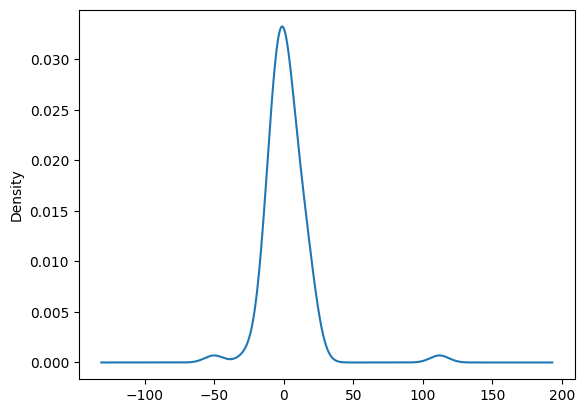

In [271]:
model_fit.resid.plot(kind='kde')

In [272]:
test_data['Predicted_Arima']=pred

<Axes: xlabel='Month'>

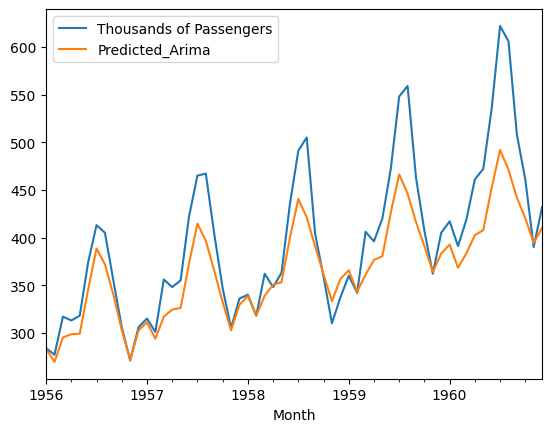

In [275]:
test_data[['Thousands of Passengers','Predicted_Arima']].plot()

In [277]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [282]:
model_sarima=SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

In [289]:
model_sarima_fit=model_sarima.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.18261D+00    |proj g|=  4.32163D-02

At iterate    5    f=  3.17613D+00    |proj g|=  3.18801D-02


 This problem is unconstrained.



At iterate   10    f=  3.17248D+00    |proj g|=  2.87530D-03

At iterate   15    f=  3.16990D+00    |proj g|=  1.51293D-02

At iterate   20    f=  3.16245D+00    |proj g|=  1.30028D-02

At iterate   25    f=  3.15869D+00    |proj g|=  3.73505D-03

At iterate   30    f=  3.15804D+00    |proj g|=  2.76101D-03

At iterate   35    f=  3.15800D+00    |proj g|=  5.64762D-04

At iterate   40    f=  3.15797D+00    |proj g|=  4.55163D-03

At iterate   45    f=  3.15778D+00    |proj g|=  6.30331D-03

At iterate   50    f=  3.15762D+00    |proj g|=  1.35401D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     57   

/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [286]:
model_sarima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.240
Date:                             Tue, 02 Jul 2024   AIC                            548.481
Time:                                     19:31:03   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5981      0.938      0.638      0.524      -1.239       2.436
ar.L2          0.8311      0.232      3.582      0.000       0.376       1.286
ar.L3         -0.4523      0.894     -0.506      0.613      -2.204       1.299
ma.L1          0.1839      1.163      0.158      0.874      -2.095       2.463
ma.L2         -0.5340      1.260     -0.424      0.672      -3.004       1.936
ma.L3         -0.0987      0.384     -0.257      0.797      -0.851       0.653
ma.L4         -0.1273      0.337     -0.378      0.705      -0.787       0.533
ma.L5          0.2471      0.356      0.694      0.488      -0.451       0.945
sigma2        87.7331     80.954      1.084      0.278     -70.934     246.400
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [290]:
pred_sarima=model_sarima_fit.predict(start=pre_start_date,end=pre_end_date)
residuals=test_data['Thousands of Passengers']-pred_sarima

In [291]:
residuals

Month
1956-01-01     -2.184182
1956-02-01     -4.276997
1956-03-01      7.084187
1956-04-01      2.323988
1956-05-01      6.665373
1956-06-01     19.050816
1956-07-01      9.602438
1956-08-01     19.929415
1956-09-01      5.554919
1956-10-01     -4.217597
1956-11-01     -1.563754
1956-12-01     -6.435427
1957-01-01     -4.956519
1957-02-01    -13.010704
1957-03-01     14.012454
1957-04-01      6.211487
1957-05-01     13.207001
1957-06-01     37.481500
1957-07-01     32.674668
1957-08-01     53.828400
1957-09-01     27.079471
1957-10-01     10.078064
1957-11-01      6.339090
1957-12-01     -1.811489
1958-01-01     -4.745424
1958-02-01    -20.123747
1958-03-01     -3.534506
1958-04-01    -16.700749
1958-05-01     -1.160817
1958-06-01     28.710791
1958-07-01     37.426482
1958-08-01     71.142762
1958-09-01      6.894501
1958-10-01      2.423750
1958-11-01     -7.836164
1958-12-01    -19.485630
1959-01-01     -2.961710
1959-02-01    -13.866383
1959-03-01     23.160027
1959-04-01     14.4

<Axes: ylabel='Density'>

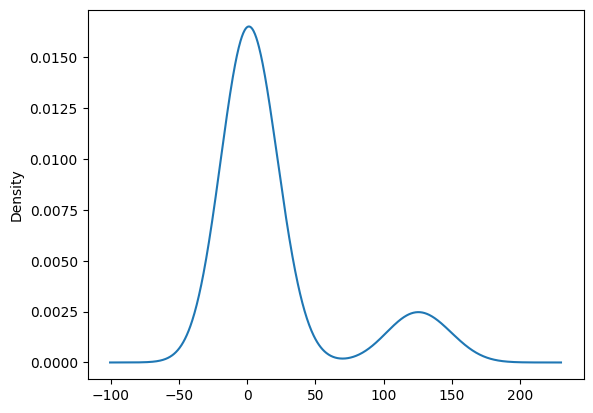

In [297]:
model_sarima_fit.resid.plot(kind='kde')

In [295]:
test_data['sarimax_prediction']=pred_sarima

<Axes: xlabel='Month'>

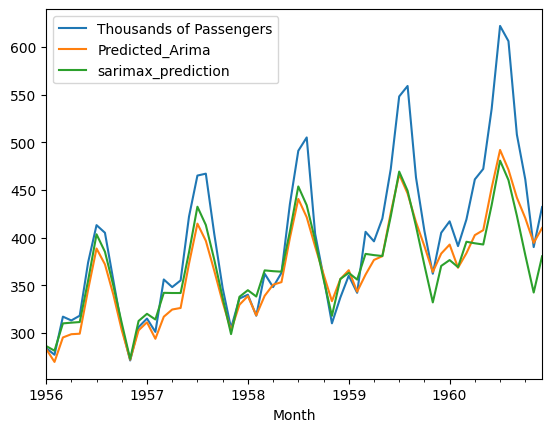

In [298]:
test_data[['Thousands of Passengers','Predicted_Arima','sarimax_prediction']].plot()